# Import libaries

In [481]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


# Data preparation

In [482]:
iris = load_iris()
X = iris['data']
y = iris['target']
target_names = iris['target_names']

In [483]:
n_samples, n_features = X.shape


In [484]:
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


# Data standaradization

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [486]:
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

In [487]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [488]:
print(X_train_scaled.shape)  # Should be (num_samples, num_features)
print(y_train.shape) # Should be (num_samples, num_classes)

(120, 4)
(120, 3)


In [489]:
model = Sequential([
    Dense(10, activation='relu', kernel_regularizer=l2(0.05), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [490]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [491]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 1.6141 - accuracy: 0.3333 - val_loss: 1.4741 - val_accuracy: 0.2083
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1.6220 - accuracy: 0.3438 - val_loss: 1.4252 - val_accuracy: 0.2500
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1.4871 - accuracy: 0.4271 - val_loss: 1.3819 - val_accuracy: 0.2917
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1.3440 - accuracy: 0.4167 - val_loss: 1.3369 - val_accuracy: 0.3333
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 1.4869 - accuracy: 0.3750 - val_loss: 1.2933 - val_accuracy: 0.3333
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 1.4160 - accuracy: 0.3750 - val_loss: 1.2514 - val_accuracy: 0.4167
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 1.2924 - accuracy: 0.4271 - val_loss: 1.2155 - val_accuracy: 0.4167
Epoch 8/100
1

In [492]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy:.2f}')

1/1 [==============================] - 0s 77ms/step - loss: 0.3718 - accuracy: 1.0000
Test Accuracy: 1.00


In [493]:
y_pred = model.predict(X_test_scaled) 
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 28ms/step


# Applying Confusion Matrix to visualize the performance of the model

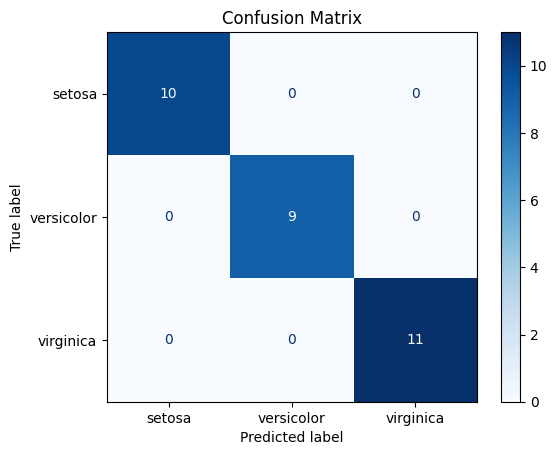

In [494]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Applying PCA

C:\Users\Sean Xander Aquino\AppData\Local\Temp\ipykernel_19400\3803518503.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_pca[y_train_labels == cl, 0],


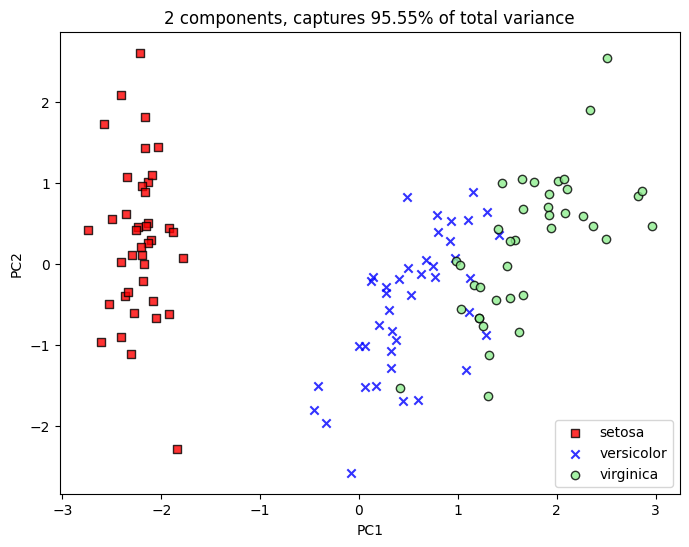

In [495]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled) 
total_variance = pca.explained_variance_ratio_.sum() * 100

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')

# Convert one-hot encoded y_train back to categorical label
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train

plt.figure(figsize=(8, 6))
for idx, cl in enumerate(np.unique(y_train_labels)):
    plt.scatter(X_train_pca[y_train_labels == cl, 0], 
                X_train_pca[y_train_labels == cl, 1],
                alpha=0.8, c=colors[idx % len(colors)], marker=markers[idx % len(markers)], 
                label=target_names[cl], edgecolor='black')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'2 components, captures {total_variance:.2f}% of total variance')
plt.legend(loc="lower right")
plt.show()


# Visualization of the accuracy and loss

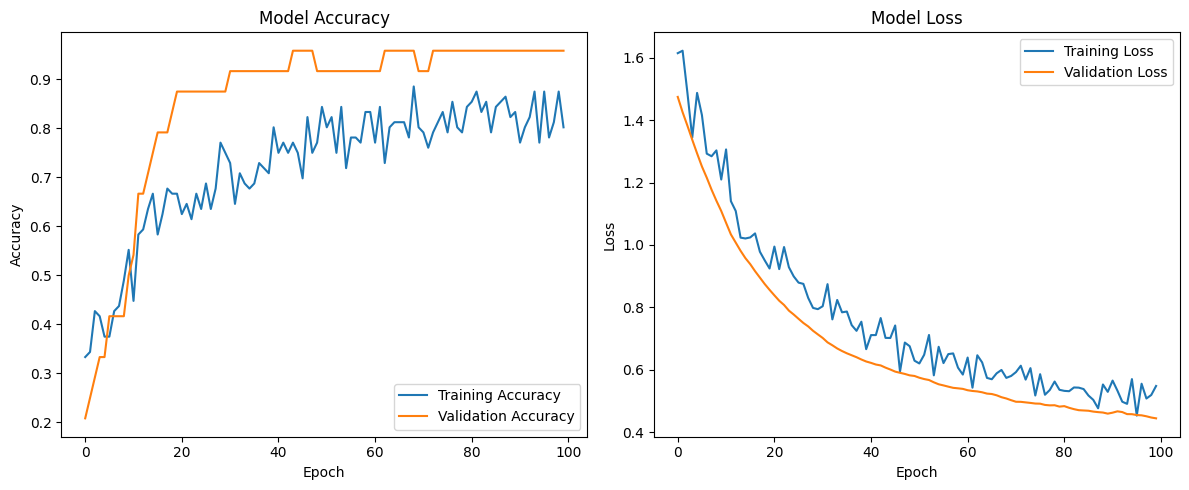

In [496]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [497]:
# Extract training and validation accuracy/loss
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Training Accuracy: {train_acc:.2%}")
print(f"Validation Accuracy: {val_acc:.2%}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

Training Accuracy: 80.21%
Validation Accuracy: 95.83%
Training Loss: 0.5485
Validation Loss: 0.4449
